In [1]:
import torch
from torchvision.models.detection import keypointrcnn_resnet50_fpn

# –ó–∞–≥—Ä—É–∂–∞–µ–º –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å
model = keypointrcnn_resnet50_fpn(pretrained=True)

# –ü–µ—Ä–µ–≤–æ–¥–∏–º –º–æ–¥–µ–ª—å –≤ —Ä–µ–∂–∏–º –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞
model.eval()

# –ï—Å–ª–∏ –¥–æ—Å—Ç—É–ø–µ–Ω GPU, –ø–µ—Ä–µ–Ω–æ—Å–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –Ω–µ–≥–æ
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


d:\SF-Projects\ComputerVision\Diplom\pose_env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\SF-Projects\ComputerVision\Diplom\pose_env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [2]:
print(torch.cuda.get_device_name(0))  # –ù–∞–∑–≤–∞–Ω–∏–µ –≤–∏–¥–µ–æ–∫–∞—Ä—Ç—ã, –µ—Å–ª–∏ –æ–Ω–∞ –µ—Å—Ç—å


NVIDIA GeForce GTX 1660 SUPER


In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)           
print(torch.cuda.is_available())   


2.1.0+cu118
11.8
True


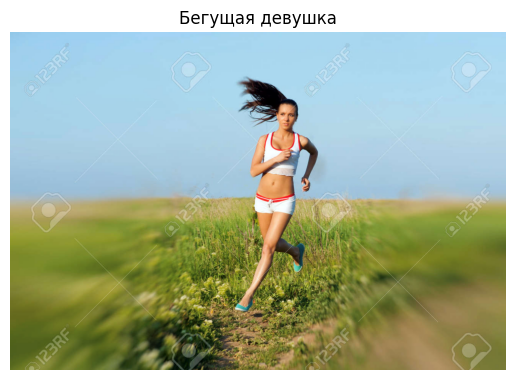

In [ ]:
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

# –°–ø–∏—Å–æ–∫ –∫–ª—é—á–µ–≤—ã—Ö —Ç–æ—á–µ–∫ COCO
keypoints_names = [
    'nose', 'left_eye', 'right_eye',
    'left_ear', 'right_ear', 'left_shoulder',
    'right_shoulder', 'left_elbow', 'right_elbow',
    'left_wrist', 'right_wrist', 'left_hip',
    'right_hip', 'left_knee', 'right_knee',
    'left_ankle', 'right_ankle'
]

# –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
img_path = 'data/dspr_cv_u1_diploma_spr1_3_1.png'
image = Image.open(img_path).convert("RGB")
transform = T.Compose([T.ToTensor()])
image_tensor = transform(image).to(device)  # –ø–µ—Ä–µ–º–µ—Å—Ç–∏—Ç—å —Ç–µ–Ω–∑–æ—Ä –Ω–∞ GPU

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è (–ø–æ –∂–µ–ª–∞–Ω–∏—é)
plt.imshow(image)
plt.axis("off")
plt.title("–ë–µ–≥—É—â–∞—è –¥–µ–≤—É—à–∫–∞")
plt.show()


In [ ]:
# –ò–Ω—Ñ–µ—Ä–µ–Ω—Å
with torch.no_grad():
    output = model([image_tensor])[0]  # batch –∏–∑ 1 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è

# –ü–æ–ª—É—á–µ–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö —Ç–æ—á–µ–∫
# (–∫–ª—é—á–µ–≤—ã–µ —Ç–æ—á–∫–∏ –∫–∞–∂–¥–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ ‚Äî —Å–ø–∏—Å–æ–∫ –∏–∑ (x, y, score), shape: [N, 17, 3])
keypoints = output['keypoints']
scores = output['scores']

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è: –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è —Å —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å > 0.9
threshold = 0.9
if scores[0] > threshold:
    print("–ö–ª—é—á–µ–≤—ã–µ —Ç–æ—á–∫–∏ –ø–µ—Ä–≤–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞:")
    print(keypoints[0])  # —Ç–µ–Ω–∑–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ [17, 3]
else:
    print("–ß–µ–ª–æ–≤–µ–∫ –Ω–µ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω –∏–ª–∏ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å < 0.9")

–ö–ª—é—á–µ–≤—ã–µ —Ç–æ—á–∫–∏ –ø–µ—Ä–≤–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞:
tensor([[724.5498, 228.4089,   1.0000],
        [736.7170, 218.4422,   1.0000],
        [715.7010, 217.3347,   1.0000],
        [751.0963, 226.1940,   1.0000],
        [700.2155, 218.4422,   1.0000],
        [762.1574, 287.1017,   1.0000],
        [665.9263, 285.9943,   1.0000],
        [795.3405, 319.2167,   1.0000],
        [639.3798, 363.5132,   1.0000],
        [778.7490, 381.2318,   1.0000],
        [700.2155, 334.7205,   1.0000],
        [720.1254, 447.6765,   1.0000],
        [661.5018, 445.4617,   1.0000],
        [676.9873, 567.2771,   1.0000],
        [685.8362, 567.2771,   1.0000],
        [631.6370, 682.4480,   1.0000],
        [748.8842, 578.3511,   1.0000]], device='cuda:0')


In [6]:
import numpy as np
import cv2

def draw_keypoints_per_person(
    img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9
):
    cmap = plt.get_cmap("rainbow")
    img_copy = img.copy()
    color_id = np.arange(1, 255, 255 // len(all_keypoints)).tolist()[::-1]

    for person_id in range(len(all_keypoints)):
        if confs[person_id] > conf_threshold:
            keypoints = all_keypoints[person_id, ...]
            scores = all_scores[person_id, ...]
            for kp in range(len(scores)):
                if scores[kp] > keypoint_threshold:
                    keypoint = tuple(
                        map(int, keypoints[kp, :2].detach().cpu().numpy().tolist())
                    )
                    color = tuple(np.asarray(cmap(color_id[person_id])[:-1]) * 255)
                    cv2.circle(img_copy, keypoint, 5, color, -1)

    return img_copy


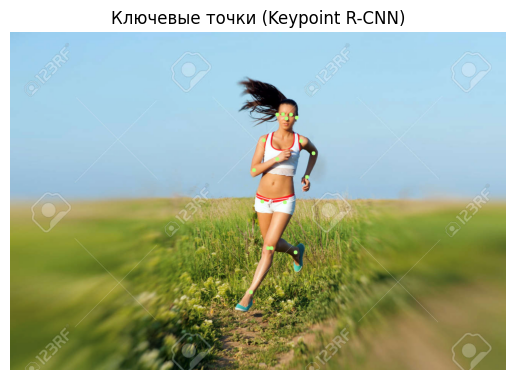

In [8]:
import numpy as np
import cv2

# –ü–æ–ª—É—á–∞–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞
all_keypoints = output["keypoints"]                # [N, 17, 3]
all_scores = output["keypoints"][..., 2]           # [N, 17] ‚Äî confidence –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–∏
confs = output["scores"]                           # [N] ‚Äî —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞

# –ü–µ—Ä–µ–≤–æ–¥–∏–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≤ —Ñ–æ—Ä–º–∞—Ç BGR –¥–ª—è OpenCV
img_cv = np.array(image)[:, :, ::-1].copy()        # RGB -> BGR

# –û—Ç—Ä–∏—Å–æ–≤—ã–≤–∞–µ–º –∫–ª—é—á–µ–≤—ã–µ —Ç–æ—á–∫–∏
result_img = draw_keypoints_per_person(
    img_cv, all_keypoints, all_scores, confs,
    keypoint_threshold=0.5,
    conf_threshold=0.5
)


# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("–ö–ª—é—á–µ–≤—ã–µ —Ç–æ—á–∫–∏ (Keypoint R-CNN)")
plt.show()


In [9]:
def get_limbs_from_keypoints(keypoints):
    limbs = [
        [keypoints.index("right_eye"), keypoints.index("nose")],
        [keypoints.index("right_eye"), keypoints.index("right_ear")],
        [keypoints.index("left_eye"), keypoints.index("nose")],
        [keypoints.index("left_eye"), keypoints.index("left_ear")],
        [keypoints.index("right_shoulder"), keypoints.index("right_elbow")],
        [keypoints.index("right_elbow"), keypoints.index("right_wrist")],
        [keypoints.index("left_shoulder"), keypoints.index("left_elbow")],
        [keypoints.index("left_elbow"), keypoints.index("left_wrist")],
        [keypoints.index("right_hip"), keypoints.index("right_knee")],
        [keypoints.index("right_knee"), keypoints.index("right_ankle")],
        [keypoints.index("left_hip"), keypoints.index("left_knee")],
        [keypoints.index("left_knee"), keypoints.index("left_ankle")],
        [keypoints.index("right_shoulder"), keypoints.index("left_shoulder")],
        [keypoints.index("right_hip"), keypoints.index("left_hip")],
        [keypoints.index("right_shoulder"), keypoints.index("right_hip")],
        [keypoints.index("left_shoulder"), keypoints.index("left_hip")],
    ]
    return limbs


limbs = get_limbs_from_keypoints(keypoints_names)

In [10]:
def draw_skeleton_per_person(
    img, all_keypoints, all_scores, confs, limbs,
    keypoint_threshold=2, conf_threshold=0.9
):
    cmap = plt.get_cmap("rainbow")
    img_copy = img.copy()
    color_id = np.arange(1, 255, 255 // len(all_keypoints)).tolist()[::-1]

    for person_id in range(len(all_keypoints)):
        if confs[person_id] > conf_threshold:
            keypoints = all_keypoints[person_id, ...]
            scores = all_scores[person_id, ...]
            for limb in limbs:
                p1, p2 = limb
                if scores[p1] > keypoint_threshold and scores[p2] > keypoint_threshold:
                    pt1 = tuple(map(int, keypoints[p1, :2].detach().cpu().numpy().tolist()))
                    pt2 = tuple(map(int, keypoints[p2, :2].detach().cpu().numpy().tolist()))
                    color = tuple(np.asarray(cmap(color_id[person_id])[:-1]) * 255)
                    cv2.line(img_copy, pt1, pt2, color, thickness=2)

    return img_copy


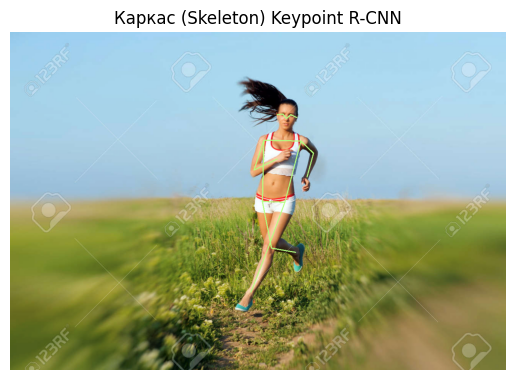

In [11]:
# –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç–µ –∂–µ –¥–∞–Ω–Ω—ã–µ –∏–∑ –∏–Ω—Ñ–µ—Ä–µ–Ω—Å–∞
all_keypoints = output["keypoints"]
all_scores = output["keypoints"][..., 2]
confs = output["scores"]

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ
img_cv = np.array(image)[:, :, ::-1].copy()

# –†–∏—Å—É–µ–º –∫–∞—Ä–∫–∞—Å
skeleton_img = draw_skeleton_per_person(
    img_cv, all_keypoints, all_scores, confs, limbs,
    keypoint_threshold=0.5, conf_threshold=0.5
)

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
plt.imshow(cv2.cvtColor(skeleton_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("–ö–∞—Ä–∫–∞—Å (Skeleton) Keypoint R-CNN")
plt.show()


In [12]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –≤—Ç–æ—Ä–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è 
img_path2 = 'data/test.jpg'
image2 = Image.open(img_path2).convert("RGB")
image_tensor2 = transform(image2).to(device)

# –ò–Ω—Ñ–µ—Ä–µ–Ω—Å
with torch.no_grad():
    output2 = model([image_tensor2])[0]

# –ò–∑–≤–ª–µ–∫–∞–µ–º –∫–ª—é—á–µ–≤—ã–µ —Ç–æ—á–∫–∏
keypoints2 = output2['keypoints']
scores2 = output2['scores']


In [13]:
threshold = 0.9
if scores2[0] > threshold:
    user_keypoints = keypoints2[0][:, :2].cpu().numpy()  # [17, 2]
else:
    print("–ß–µ–ª–æ–≤–µ–∫ –Ω–µ —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω –∏–ª–∏ —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å < 0.9")


In [14]:
model_keypoints = keypoints[0][:, :2].cpu().numpy()  # –∏–∑ –ø–µ—Ä–≤–æ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è


In [15]:
def pad(x): return np.hstack([x, np.ones((x.shape[0], 1))])
def unpad(x): return x[:, :-1]

X = pad(user_keypoints)
Y = pad(model_keypoints)

A, _, _, _ = np.linalg.lstsq(X, Y, rcond=None)
user_aligned = unpad(np.dot(X, A))


In [16]:
def draw_limbs_from_indices(keypoints_xy, limbs_indices, color='r', label=''):
    for i, j in limbs_indices:
        if i < len(keypoints_xy) and j < len(keypoints_xy):
            x1, y1 = keypoints_xy[i]
            x2, y2 = keypoints_xy[j]
            plt.plot([x1, x2], [y1, y2], color=color)
    plt.scatter(keypoints_xy[:, 0], keypoints_xy[:, 1], c=color, label=label)


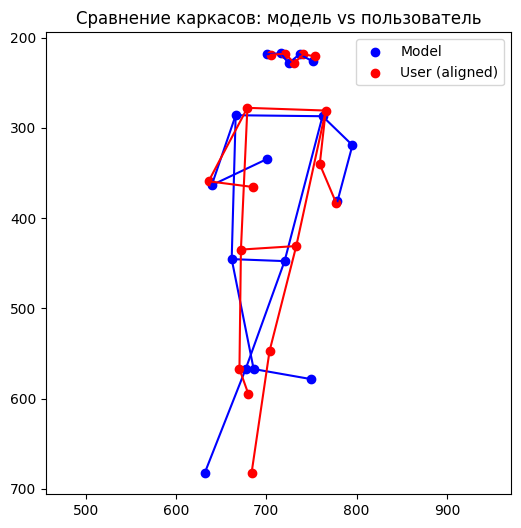

In [17]:
def draw_limbs(keypoints, color='r', label=''):
    limbs = get_limbs_from_keypoints(keypoints)
    for x1, y1, x2, y2 in limbs:
        plt.plot([x1, x2], [y1, y2], color=color)
    plt.scatter(keypoints[:, 0], keypoints[:, 1], c=color, label=label)

limbs_indices = get_limbs_from_keypoints(keypoints_names)

plt.figure(figsize=(6, 6))
draw_limbs_from_indices(model_keypoints, limbs_indices, color='blue', label='Model')
draw_limbs_from_indices(user_aligned, limbs_indices, color='red', label='User (aligned)')
plt.legend()
plt.title("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –∫–∞—Ä–∫–∞—Å–æ–≤: –º–æ–¥–µ–ª—å vs –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å")
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()


In [18]:
def procrustes_distance(X, Y):
    Xc = X - X.mean(0)
    Yc = Y - Y.mean(0)
    Xn = Xc / np.linalg.norm(Xc)
    Yn = Yc / np.linalg.norm(Yc)
    return np.linalg.norm(Xn - Yn)

distance = procrustes_distance(user_aligned, model_keypoints)
print(f"–ü—Ä–æ–∫—Ä—É—Å—Ç–æ–≤–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distance:.4f}")


–ü—Ä–æ–∫—Ä—É—Å—Ç–æ–≤–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 0.1831


In [ ]:
if distance < 0.1:
    print("–ü–æ–∑—ã —Å–æ–≤–ø–∞–¥–∞—é—Ç —Ö–æ—Ä–æ—à–æ ‚úÖ")
elif distance < 0.25:
    print("–ü–æ–∑—ã –ø–æ—Ö–æ–∂–∏, –Ω–æ –µ—Å—Ç—å –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è ‚ö†Ô∏è")
else:
    print("–ü–æ–∑—ã —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞—é—Ç—Å—è ‚ùå")


–ü–æ–∑—ã –ø–æ—Ö–æ–∂–∏, –Ω–æ –µ—Å—Ç—å –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è ‚ö†Ô∏è


In [20]:
def cosine_distance(pose1, pose2):
    # flatten -> –ø—Ä–µ–≤—Ä–∞—â–∞–µ–º 17x2 –≤ –≤–µ–∫—Ç–æ—Ä –¥–ª–∏–Ω—ã 34
    pose1 = pose1.flatten()
    pose2 = pose2.flatten()
    
    dot = np.dot(pose1, pose2)
    norm1 = np.linalg.norm(pose1)
    norm2 = np.linalg.norm(pose2)

    if norm1 == 0 or norm2 == 0:
        return 0.0  # –µ—Å–ª–∏ –ø–æ–∑–∞ –ø—É—Å—Ç–∞—è
    cossim = dot / (norm1 * norm2)
    return cossim


In [21]:
import math

def weight_distance(pose1, pose2, conf1):
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ –≤–µ–∫—Ç–æ—Ä—ã: [x0, y0, x1, y1, ..., x16, y16]
    p1 = pose1.flatten()
    p2 = pose2.flatten()

    # –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤–µ—Å–æ–≤: [c0, c0, c1, c1, ..., c16, c16]
    weights = np.repeat(conf1, 2)

    diff = np.abs(p1 - p2)
    weighted = weights * diff
    return np.sum(weighted) / np.sum(conf1)


In [22]:
# model_keypoints –∏ user_aligned: shape [17, 2]
# conf1 ‚Äî –¥–æ–≤–µ—Ä–∏–µ –∫ –∫–∞–∂–¥–æ–π —Ç–æ—á–∫–µ (–∏–∑ output['keypoints'][..., 2])
conf1 = output['keypoints'][0, :, 2].cpu().numpy()

cos_dist = cosine_distance(model_keypoints, user_aligned)
w_dist = weight_distance(model_keypoints, user_aligned, conf1)

print(f"–ö–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ: {cos_dist:.4f}")
print(f"–í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {w_dist:.4f}")


–ö–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ: 0.9994
–í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 25.0362


### üìä **–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –ø–æ–∑**

| –ú–µ—Ç—Ä–∏–∫–∞                   | –ó–Ω–∞—á–µ–Ω–∏–µ   | –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è                                      |
|---------------------------|------------|----------------------------------------------------|
| **–ö–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ**   | `0.9994`   | üîµ –ü–æ–∑—ã –∏–º–µ—é—Ç –ø–æ—á—Ç–∏ –∏–¥–µ–Ω—Ç–∏—á–Ω—É—é —Ñ–æ—Ä–º—É –∏ –æ—Ä–∏–µ–Ω—Ç–∞—Ü–∏—é  |
| **–í–∑–≤–µ—à–µ–Ω–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ** | `25.04`    | üü° –£–º–µ—Ä–µ–Ω–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ –ø–æ —Ç–æ—á–∫–∞–º (–≤ –ø–∏–∫—Å–µ–ª—è—Ö)     |

---

### üß† **–í—ã–≤–æ–¥:**
–ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å **—Ö–æ—Ä–æ—à–æ –ø–æ–≤—Ç–æ—Ä–∏–ª –ø–æ–∑—É**:
- –§–æ—Ä–º–∞ –∏ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Å—É—Å—Ç–∞–≤–æ–≤ —Å–æ–≤–ø–∞–¥–∞—é—Ç –ø–æ—á—Ç–∏ –∏–¥–µ–∞–ª—å–Ω–æ.
- –ï—Å—Ç—å –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –≤ –ø–æ–∑–∏—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏ —Ç–µ–ª–∞.
